#Overview Data
The dog and cat image dataset is a collection of images depicting various breeds of dogs and cats. It serves as a fundamental resource for training and evaluating computer vision models, particularly those designed to classify images. With the aim of enhancing the model's ability to distinguish between dogs and cats, the dataset comprises a diverse range of images that encapsulate the distinctive features and characteristics of different breeds.

Each image within the dataset is labeled as either a dog or a cat, facilitating supervised learning for the machine learning model. The images themselves are of varying dimensions and resolutions, capturing dogs and cats in different poses, environments, and backgrounds. From playful puppies to regal adult dogs, and from curious kittens to graceful adult cats, the dataset encompasses a comprehensive representation of the two animal categories.

The dataset is carefully curated to encompass a wide array of breeds, colors, fur textures, and sizes, ensuring that the model can generalize well across various dog and cat types. This inclusivity aids in mitigating biases that might arise from an overrepresentation of certain breeds. Additionally, the dataset features images with diverse lighting conditions, angles, and orientations, simulating real-world scenarios where the model might encounter images taken under different circumstances.

Furthermore, the dataset includes images captured in both indoor and outdoor settings, providing a holistic view of how dogs and cats can appear in different environments. This variety helps the model develop robust classification capabilities, allowing it to discern between the two animals in different contexts accurately. The dataset also encompasses images with varying backgrounds, such as natural landscapes, urban scenes, and domestic interiors, ensuring that the model can effectively differentiate between animals and their surroundings.

In summary, the dog and cat image dataset is a comprehensive collection of meticulously labeled images that encapsulate the diversity, nuances, and intricacies of dogs and cats. By providing a rich variety of images featuring different breeds, poses, environments, and backgrounds, the dataset equips machine learning models with the necessary tools to accurately classify and distinguish between these two popular pet categories.

In [200]:
from google .colab import files
from IPython.display import Image
uploded=files.upload()

Saving dog-cat-190709-1000x563.jpg to dog-cat-190709-1000x563.jpg


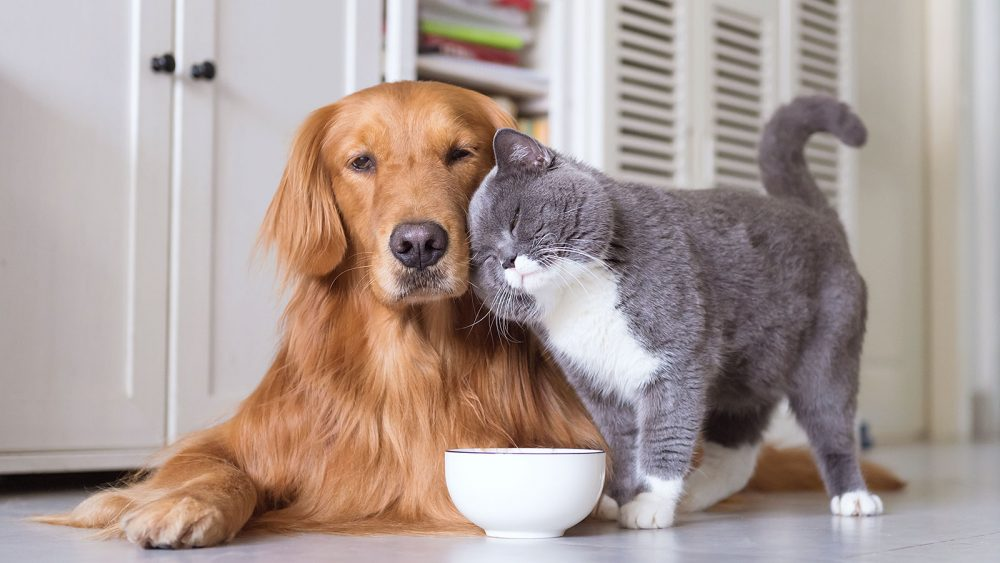

In [202]:
Image('dog-cat-190709-1000x563.jpg')

#Imported the necessary libraries



In [161]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras import models, layers
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [162]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [163]:
!chmod 600 /root/.kaggle/kaggle.json

In [164]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#Resizing

In [165]:
def preprocess_image(image):
    image = tf.image.resize(image, (256, 256))
    return image

#Data Augmentation

In [174]:
datagen_train= ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=40,
    preprocessing_function=preprocess_image)

datagen_test= ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=40,
    preprocessing_function=preprocess_image)

In [ ]:
images, labels = next(datagen_train)

# Plotting the images
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].astype(np.uint8))
    ax.axis('off')

plt.show()

# Import Train_Dataset and Test_Dataset

In [175]:
train_ds = datagen_train.flow_from_directory(
    "/content/train",
    seed=123,
    shuffle=True,
    target_size=(256,256),
    batch_size=32,class_mode='sparse'
)


test_ds = datagen_test.flow_from_directory(
    "/content/test",
    seed=123,
    shuffle=True,
    target_size=(256,256),
    batch_size=32,class_mode='sparse'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


#Create Model

In [187]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))
model.build(input_shape=(256, 256, 3))

In [188]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_24 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_25 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

#Compiling the Model

In [189]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [191]:
history = model.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
625/625 [==============================] - 468s 738ms/step - loss: 1.7400 - accuracy: 0.5756 - val_loss: 0.6480 - val_accuracy: 0.6126
Epoch 2/20
625/625 [==============================] - 452s 724ms/step - loss: 0.6415 - accuracy: 0.6522 - val_loss: 1.0175 - val_accuracy: 0.6178
Epoch 3/20
625/625 [==============================] - 494s 791ms/step - loss: 0.6350 - accuracy: 0.6758 - val_loss: 0.5565 - val_accuracy: 0.7480
Epoch 4/20
625/625 [==============================] - 529s 847ms/step - loss: 0.5286 - accuracy: 0.7354 - val_loss: 0.5504 - val_accuracy: 0.7146
Epoch 5/20
625/625 [==============================] - 448s 717ms/step - loss: 0.5206 - accuracy: 0.7459 - val_loss: 0.5145 - val_accuracy: 0.7636
Epoch 6/20
625/625 [==============================] - 510s 816ms/step - loss: 0.4909 - accuracy: 0.7660 - val_loss: 0.4800 - val_accuracy: 0.7728
Epoch 7/20
625/625 [==============================] - 451s 721ms/step - loss: 0.4722 - accuracy: 0.7774 - val_loss: 0.5012 -

In [193]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

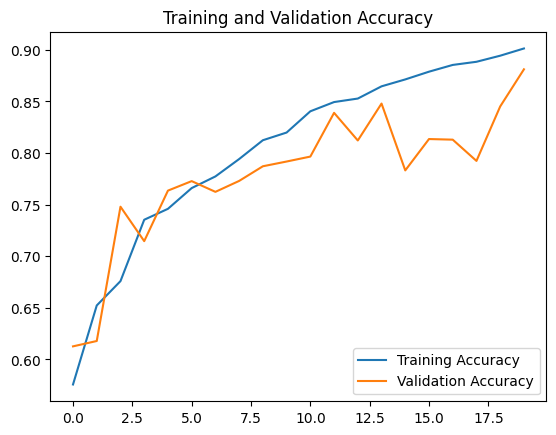

In [194]:
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

# Add a legend and title.
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Show the plot.
plt.show()

#Conclusion


In summary, the CNN model trained on the dog and cat image dataset showed consistent improvement over 20 epochs, achieving approximately 90.14% training accuracy and 88.12% validation accuracy. The model effectively learned to distinguish between dogs and cats, with the training and validation loss decreasing steadily. However, minor fluctuations in validation metrics suggest room for further optimization, possibly through increased data diversity and model fine-tuning.